<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/KNN_Regression_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Regression - Supervised Learning


Prediction of the sale price based on k-nearest neighbors with scikit-learn.  
Please visit [sklearn-Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for full details and information.

---

## Objectives


Build k-nearest neighbors regressions for predicting the sale price of house.
* Explore date
* Identify features of interest
* Build model
* Evaluate model
* Improve model
* Make predictions on our own data
* Conclusions
* Bonus : use map for data analysis

## 1. Librairies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set()
import plotly.express as px

## 2. Data

Donwload dataset from an URL (github repo).  
KC house dataset : King Country (USA) house dataset , containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. [Kaggle Competition](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [2]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/kc_house_data.csv"
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


First exploration and describing.

In [3]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id               0
date             0
price            4
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 3. Identify features of interest

This part relates to the selection of features (i.e. variables or columns) that would have a positive impact on the goodness of fit of our prediction model.  
This topic is called feature engineering ([Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)).  
We are going to exploit the correlation matrix as insights for this kind of selection.  
We could expect features which are the most correlated to the price will have a positive impact on the goodness of fit of our model.

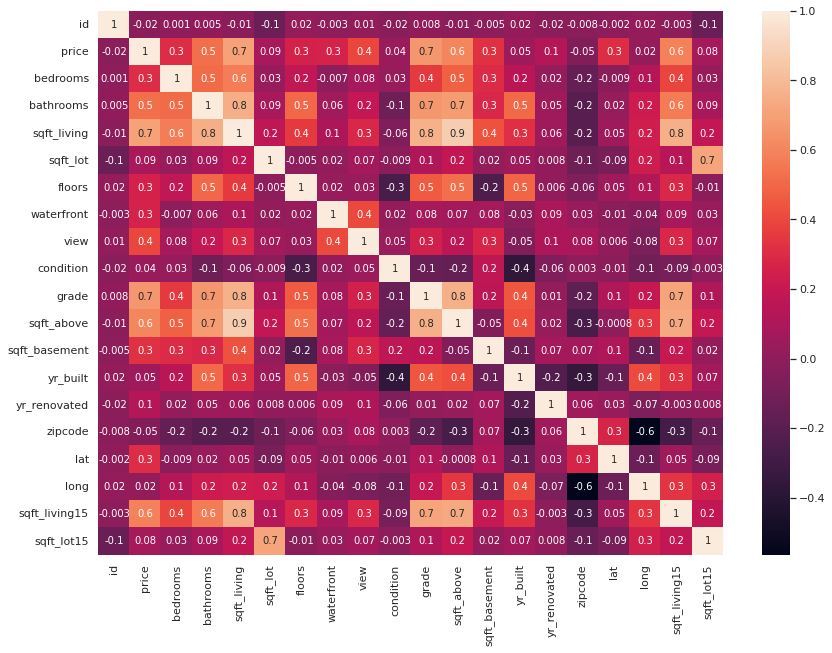

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df.select_dtypes(include=['float64', 'int64']).dropna().corr(), annot=True, fmt='.1g')

In [7]:
df.select_dtypes(include=['float64', 'int64']).dropna().corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001092,0.005006,-0.012418,-0.132172,0.018655,-0.002733,0.011553,-0.023871,0.008087,-0.010971,-0.005241,0.021541,-0.016937,-0.008212,-0.001868,0.020848,-0.003091,-0.138878
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001092,0.308330,1.000000,0.515776,0.576602,0.031663,0.175579,-0.006594,0.079504,0.028399,0.356934,0.477528,0.303059,0.154369,0.018817,-0.152595,-0.008891,0.129466,0.391525,0.029191
bathrooms,0.005006,0.525168,0.515776,1.000000,0.754653,0.087711,0.500883,0.063743,0.187732,-0.125080,0.664994,0.685323,0.283748,0.506326,0.050722,-0.203729,0.024630,0.222993,0.568579,0.087138
sqft_living,-0.012418,0.702040,0.576602,0.754653,1.000000,0.172798,0.354114,0.103815,0.284597,-0.058834,0.762715,0.876590,0.435012,0.318266,0.055342,-0.199375,0.052559,0.240229,0.756387,0.183249
sqft_lot,-0.132172,0.089639,0.031663,0.087711,0.172798,1.000000,-0.005149,0.021599,0.074694,-0.008994,0.113614,0.183498,0.015250,0.053160,0.007632,-0.129554,-0.085683,0.229523,0.144567,0.718551
floors,0.018655,0.256894,0.175579,0.500883,0.354114,-0.005149,1.000000,0.023715,0.029499,-0.263690,0.458251,0.524017,-0.245620,0.489212,0.006375,-0.059254,0.049621,0.125491,0.280107,-0.011208
waterfront,-0.002733,0.266367,-0.006594,0.063743,0.103815,0.021599,0.023715,1.000000,0.401856,0.016644,0.082774,0.072072,0.080581,-0.026144,0.092882,0.030300,-0.014274,-0.041918,0.086457,0.030698
view,0.011553,0.397280,0.079504,0.187732,0.284597,0.074694,0.029499,0.401856,1.000000,0.045956,0.251320,0.167639,0.276923,-0.053376,0.103907,0.084878,0.006156,-0.078423,0.280417,0.072556
condition,-0.023871,0.036314,0.028399,-0.125080,-0.058834,-0.008994,-0.263690,0.016644,0.045956,1.000000,-0.144697,-0.158270,0.174042,-0.361336,-0.060645,0.003107,-0.014943,-0.106547,-0.092951,-0.003448


Based on the correlation matrix, features are given below by order of interest :

In [8]:
df.select_dtypes(include=['float64', 'int64']).dropna().corr().iloc[1].sort_values(ascending=False)#[1:].index

price            1.000000
sqft_living      0.702040
grade            0.667444
sqft_above       0.605574
sqft_living15    0.585372
bathrooms        0.525168
view             0.397280
sqft_basement    0.323782
bedrooms         0.308330
lat              0.307012
waterfront       0.266367
floors           0.256894
yr_renovated     0.126420
sqft_lot         0.089639
sqft_lot15       0.082420
yr_built         0.054123
condition        0.036314
long             0.021601
id              -0.016826
zipcode         -0.053150
Name: price, dtype: float64

Let's plot a 3-D representation to show how price may be correlated to multiple features.

In [9]:
import plotly.express as px
fig = px.scatter_3d(df, x="sqft_living", y="sqft_above", z="price", hover_name="id", color="grade", width=800, height=800)
fig.show()

## 4. Build a first KNN model

We are going to build a first and simple model based on k-nearest neighbors.  
But before, split the whole data into two sub datasets : train & test.

In [10]:
from sklearn.model_selection import train_test_split
y = df.dropna()['price']

For a first try, our features are considered as the 5 most correlated variables to the house's prices.

In [11]:
top5_features = df.select_dtypes(include=['float64', 'int64']).dropna().corr().iloc[1].sort_values(ascending=False)[1:6].index
X = df.dropna()[top5_features]
X.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,1180,7,1180,1340,1.00
1,2570,7,2170,1690,2.25
2,770,6,770,2720,1.00
3,1960,7,1050,1360,3.00
4,1680,8,1680,1800,2.00


Last step : train - test - split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403


### Model training & evaluation

In [13]:
from sklearn.neighbors  import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6577711165866038

### Model evaluation

The root-mean-square error (RMSE) is a frequently used metric.  
It measures the differences between values (sample or population values) predicted by a model and the values observed. [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [14]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
mean_squared_error(y_test, prediction)
print("The RMSE is pretty poor :", round(np.sqrt(mean_squared_error(y_test, prediction)), 2))

The RMSE is pretty poor : 260616.29


:( 

## 5. Build a 2nd model : K optimisation

We are going to build a second model with optimisation of the K parameter using GridSearch strategy.

### Define a range of K-value as hyperparameter.

In [15]:
parameters = {'n_neighbors': range(1, 21)}

### Define the regression model

In [16]:
model = KNeighborsRegressor()

### Fit the model by GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, parameters, cv = 5, n_jobs =-1, verbose = 1)

In [18]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=1)

### Retrieve best score & best parameters

In [19]:
grid.best_score_

0.5379176901228541

In [20]:
grid.best_params_

{'n_neighbors': 19}

Lis of params :

In [21]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

### Plot K-values against performance score

Get the values of K-parameters from GridSerch.

In [22]:
list_params = grid.cv_results_['params']
list_params

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [23]:
value_params = [dic['n_neighbors'] for dic in list_params]
value_params

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Get the scores from GridSerch.

In [24]:
value_score = grid.cv_results_['mean_test_score']
value_score

array([0.19806317, 0.36913413, 0.44382631, 0.47637121, 0.4886001 ,
       0.49777438, 0.5072425 , 0.51324886, 0.51610573, 0.5230413 ,
       0.5249008 , 0.52850308, 0.53037946, 0.53219448, 0.53400925,
       0.53580503, 0.53625453, 0.53671666, 0.53791769, 0.5366254 ])

Plot the curve plot of performance optimisation : K optimum.

Text(0.5, 1.0, 'K parameter optimisation')

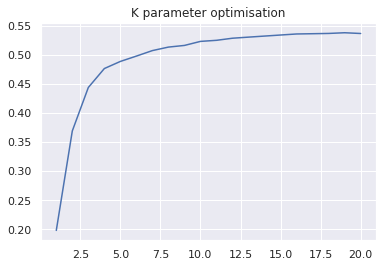

In [25]:
sns.lineplot(x=value_params, y=value_score).set_title('K parameter optimisation')

## 6. Build a 3rd model : pipeline and full optimisation by extensive GridSearch

### Define a pipeline for data preprocessing and regression model

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())]
    )

### Define a range of K-value as hyperparameter.

In [27]:
parameters = {'model__n_neighbors': range(1, 21, 2),
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['auto'], #['ball_tree', 'kd_tree', 'brute'],
              #'model__leaf_size': range(10, 101, 10),
              'model__metric': ['euclidean', 'manhattan']}#, 'chebyshev', 'minkowski']}

### Fit the model by GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipe, param_grid=parameters, cv = 5, n_jobs =-1, verbose = 1)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['auto'],
                         'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': range(1, 21, 2),
                         'model__weights': ['uniform', 'distance']},
             verbose=1)

### Retrieve best score & best parameters

In [30]:
grid.best_score_

0.5994809038032642

In [31]:
grid.best_params_

{'model__algorithm': 'auto',
 'model__metric': 'manhattan',
 'model__n_neighbors': 19,
 'model__weights': 'uniform'}

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model and the values observed. [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [32]:
from sklearn.metrics import mean_squared_error
prediction = grid.predict(X_test)
mean_squared_error(y_test, prediction)
print("The RMSE is still pretty poor :", round(np.sqrt(mean_squared_error(y_test, prediction)), 2))

The RMSE is still pretty poor : 238088.79


:( 

## 9. Make predictions on our own data

We would like to predict the sale price of our own house.  
For that purpose, we should pass to the model the new data in the convenient format : i.e. same format as the X_train dataset.

In [33]:
# Prediction for our house
my_house = pd.DataFrame(data= {'sqft_living':1200,
                               'grade':10,
                               'sqft_above':1080,
                               'sqft_living15':1750,
                               'bathrooms':2}, index=[0])

my_price = grid.predict(my_house)

prediction_error = np.sqrt(mean_squared_error(y_test, prediction))

print("Dear customer, we are sincerely greatful of your trust towards our real estate services.\nFrom provided information the sale price of your house is estimated at",
      np.around(my_price, decimals=2),
      " +/- ",
      np.around(prediction_error, decimals=2),
      "USD.")

Dear customer, we are sincerely greatful of your trust towards our real estate services.
From provided information the sale price of your house is estimated at [592632.53]  +/-  238088.79 USD.


## 10. Conclusions

* The KNN regression is an easy-to-use machine learning algorithm.
* Based on our dataset, performances of our model are not good enough to predict sale prices with satisfying confidence.
* Our model could be certainly improved with :
  - Use the whole set of feature
  - Adapted preprocessing
  - Standardisation of features
  - More advanced feature engineering : geographical areas, date effect, etc.
* Other models could provide more accurate predictions
* This [Kaggle notebook](https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa/notebook) provides lot of useful and fruitful insights on other algorithms for this dataset.

## Bonus : Map

Drawing data on a map could be provide other insights such as local areas very expensive, and leads to improve our prediction.

In [35]:
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=15,
                        center=dict(lat=df['lat'].mean(), lon=df['long'].mean()), zoom=9,
                        mapbox_style="carto-positron", width=1000, height=750,
                        hover_name="id")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## More ressources

https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa/notebook

https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://www.kaggle.com/harlfoxem/house-price-prediction-part-2

https://www.kaggle.com/vanshjatana/applied-machine-learning
